<a href="https://colab.research.google.com/github/Ismaelardoy/ProyectoIA/blob/main/Efficient%20training%20of%20neural%20networks%20through%20intelligent%20parameterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Efficient training of neural networks through intelligent parameterization

This project implements a neural network with an intelligent parameterization system, focused on automatically optimizing the model's key hyperparameters to improve its performance.

The model used will be a neural network, and the data will come from the Breast Cancer Wisconsin (Diagnostic) Data Set.

In [1]:
# Import the necessary libraries.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

from sklearn import  preprocessing # For data processing.
from sklearn import neural_network
from sklearn import model_selection
from sklearn import metrics

###We import the data.

In [2]:
# Load the dataset.
url_datos = 'https://raw.githubusercontent.com/jamaltoutouh/curso-ciencia-de-datos-python/main/breast-cancer.csv'
cancer_dataset = pd.read_csv(url_datos)

print('Dataset atributes: ', cancer_dataset.columns)
print('Dataset dimensions',cancer_dataset.shape)

Dataset atributes:  Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Dataset dimensions (569, 33)


In [3]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###Removing unnecessary columns.

In [4]:
# Remove the columns that do not provide useful data, which are 'id' and 'Unnamed: 32'.
print('\nRemove the columns id and Unnamed: 32.\n')
cancer_dataset = cancer_dataset.drop(['id', 'Unnamed: 32'],axis = 1)

# Display 5 rows of the data.
print('Dataset attributes: ', cancer_dataset.columns)
print('Dataset dimensions',cancer_dataset.shape)


Remove the columns id and Unnamed: 32.

Dataset attributes:  Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Dataset dimensions (569, 31)


###Preparing the data to be used:

In [5]:
print('Diagnosis values (before encoding): \n', cancer_dataset['diagnosis'])

cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].replace(('M'),1)
cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].replace(('B'),0)

print('Diagnosis values (after encoding):  \n', cancer_dataset['diagnosis'])

Diagnosis values (before encoding): 
 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
Diagnosis values (after encoding):  
 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


<ipython-input-5-3e17bd493a20>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].replace(('B'),0)


###Feature selection
The data will be divided into two parts:

Target or dependent variables (which we want to predict). In this case, the diagnosis.

Feature or independent variables (which we will use for prediction). In this case, all except diagnosis.

In [6]:
X = cancer_dataset.drop('diagnosis', axis=1) # X is defined by all attributes except diagnosis.
y = cancer_dataset['diagnosis']

###Creation of training and test data
To properly evaluate the performance of machine learning models, the dataset is split into a training set and a test set.

We will divide the dataset using the function train_test_split(), to which we pass four parameters: the features, the target, the fraction size of the test set, and optionally, random_state to select the records randomly.

In this case, the test set will be 20% of the data, and records will not be selected randomly.

In [7]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=0)

print('Dimensión de X_train: ', X_train.shape)
print('Dimensión de X_test: ', X_test.shape)
print('Dimensión de y_train: ', y_train.shape)
print('Dimensión de y_est: ', y_test.shape)

Dimensión de X_train:  (455, 30)
Dimensión de X_test:  (114, 30)
Dimensión de y_train:  (455,)
Dimensión de y_est:  (114,)


###Creation of the Base Model and view of its parameters

In [8]:
# Create the logistic classifier.
ann_model_basic = neural_network.MLPClassifier(max_iter=1000,random_state=0)

# Display the default parameters.
print('Default parameters: ', ann_model_basic.get_params())

Default parameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


We select the parameters we want to modify from their default values along with the list of possible values. In this case, the parameters to be modified are:

* **hidden_layer_sizes**: network structure. Defines how many hidden layers and how many neurons per layer the network has.

* **activation**: activation function. Directly affects the model's non-linearity.

* **solver**: optimization algorithm. Defines how the neural network's weights are adjusted.

* **alpha**: L2 regularization. Helps prevent overfitting.

* **learning_rate**: learning rate strategy. Controls how much the weights change at each training step.

These parameters have been chosen because they have the greatest impact on the model's learning capacity, training speed, risk of overfitting, and optimization process stability.


In [9]:
# Define the parameters to be configured.
params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}


###Grid Search
Grid Search is a tool that helps us find the best hyperparameters for our model. It tests all possible combinations we provide and identifies which one works best with our training data.

This is done using cross-validation, and in the end, it tells us which parameter combination yields the best result according to the chosen metric (for example, F1 score, accuracy, etc.).

It is very useful because we don’t have to manually try parameters, ensuring the model is well-tuned without overfitting or underfitting.

In [10]:
# Create the grid search
buscador_grid = model_selection.GridSearchCV(
    estimator=ann_model_basic,
    param_grid=params,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=3
)

# Run the search
buscador_grid.fit(X_train, y_train)

# Display search results
print('The best configuration found is:', buscador_grid.best_params_)
print('The best configuration score is:', buscador_grid.best_score_)

# Select the model with the best parameters
best_model = buscador_grid.best_estimator_
print('The complete model configuration is:', best_model.get_params())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best configuration found is: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
The best configuration score is: 0.9400234530961334
The complete model configuration is: {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


#Testing the best model.

In [11]:
# Use the trained model with the optimal parameters to make predictions on the test set.
y_pred = best_model.predict(X_test)

### Model Evaluation (Metrics)

We will evaluate four different metrics commonly used in classification problems:

* Precision

* Recall

* F1-score

* Accuracy

In [12]:
# Calculate and display different metrics
precision = metrics.precision_score(y_test, y_pred, average="macro")
recall = metrics.recall_score(y_test, y_pred, average="macro")
f1 = metrics.f1_score(y_test, y_pred, average="macro")
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

Precision: 0.9344906649197511
Recall: 0.9212448396316291
F1-score: 0.9265700483091788
Accuracy: 0.9298245614035088


###Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted Label')

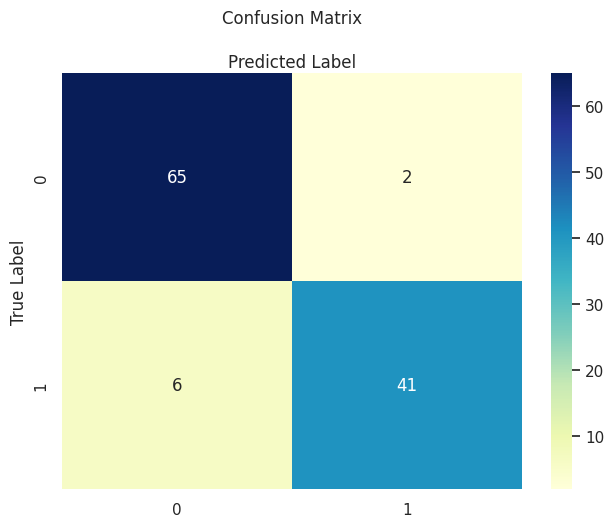

In [13]:
# Generate predictions using the best model
y_pred = best_model.predict(X_test)

# Obtain and display the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')